# Popularity data analysis

## Import libraries

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Acquistion

data link = https://raw.githubusercontent.com/Pranjulcr7/news_popularity_data_analysis/master/popularity.csv

In [96]:
df = pd.read_csv('popularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Dataset columns

In [97]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

## Data cleaning
 
 removing extra white-space in columns

In [98]:
df.columns = df.columns.str.strip()

## Dataset shape


In [99]:
df.shape

(39644, 61)

## Dataset infromation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

## No missing values present

In [ ]:
# for i in df.columns:
#     print(df[i].isnull().sum(axis=1))

## Bivariate analysis

### Shares vs Weekend 
The box plots given below show the variation of the number of shares of a news article (on the y-axis) against three variables — weekend (1 implies weekend), weekday (0 implies weekday), and the channel type

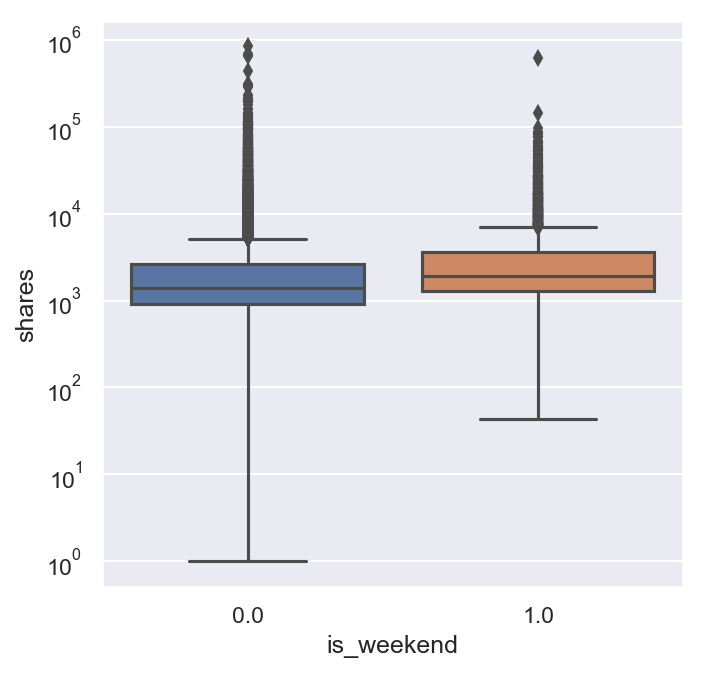

In [ ]:
sns.set( rc={'figure.figsize':(5,5), 'figure.dpi':150})
sns.boxplot(x=df['is_weekend'], y=df['shares']);
plt.yscale('log')

The width of the box, i.e. the difference between the 75th and the 25th percentiles is larger for weekends.

## Shares vs Weekday

In [ ]:
# Converting dummy variables weekday to categorical data
xyz = df.loc[:,['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday']].stack()
df['weekday'] = pd.Series(pd.Categorical(xyz[xyz!=0].index.get_level_values(1)))
df['weekday'] = df['weekday'].apply( lambda x: x[11:])
df['weekday'].value_counts()


wednesday    7435
tuesday      7390
thursday     7267
monday       6661
friday       5701
Name: weekday, dtype: int64

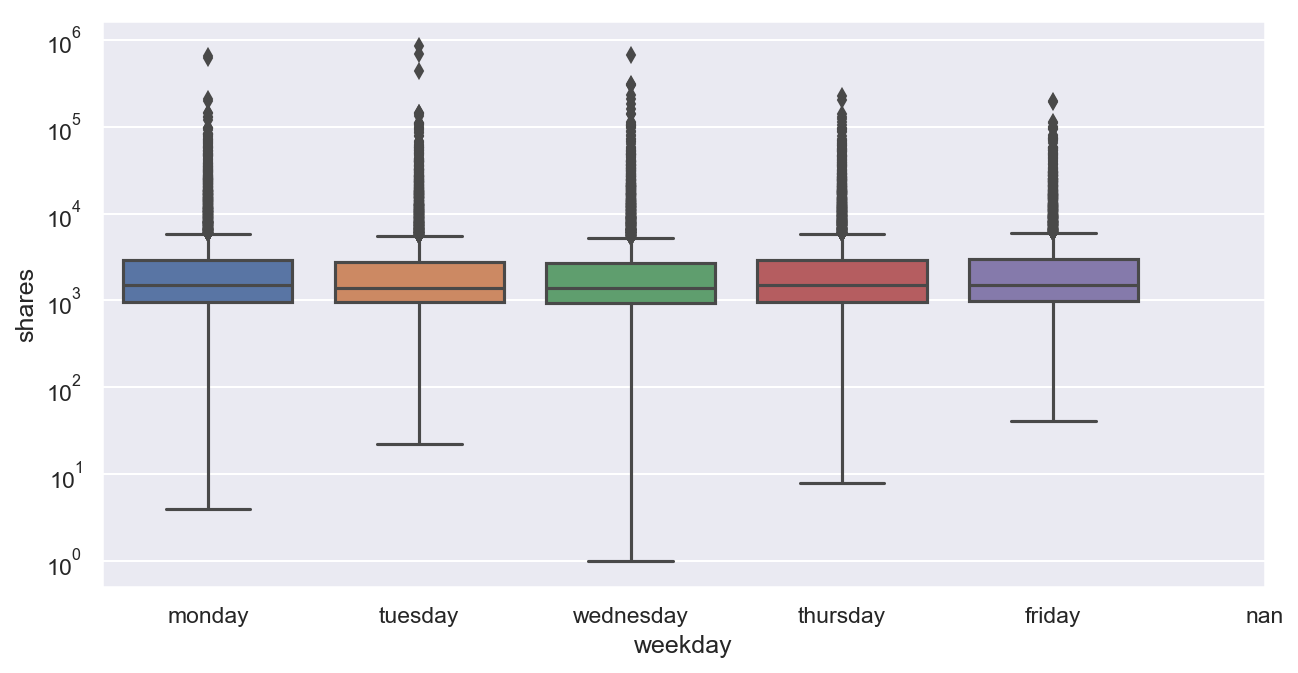

In [ ]:
sns.set( rc={'figure.figsize':(10,5), 'figure.dpi':150})
sns.boxplot(y=df['shares'], x=df['weekday'], order=df['weekday'].unique().sort_values());
plt.yscale('log')
plt.xlim(right=5);

The median and both the 25th and 75th percentiles are almost similar across weekdays, indicating that there is no significant difference in either the median or the amount of spread. Note that the means may be significantly different because of some high values, but that is a deceptive measure to look at.

## Shares vs Channel type

In [ ]:
# Converting dummy variables channel type to categorical data
xyz = df.loc[:,['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']].stack()
df['channel'] = pd.Series(pd.Categorical(xyz[xyz!=0].index.get_level_values(1)))
df['channel'] = df['channel'].apply( lambda x: x[16:])
df['channel'].value_counts()


world            8427
tech             7346
entertainment    7057
bus              6258
socmed           2323
lifestyle        2099
Name: channel, dtype: int64

In [ ]:
sns.set( rc={'figure.figsize':(10,5), 'figure.dpi':150})
sns.boxplot(y=df['shares'], x=df['channel'], order=df['channel'].unique().sort_values(), showfliers=False);
# plt.yscale("log")
plt.xlim(right=6);

Boxplot without outliers.

## Description of shares

In [ ]:
df['shares'].describe()

-  The articles were shared approx. 3395 times on average.
-  The median value of the shares is 1400.

In [ ]:
df['shares'].value_counts().head(5)



## Description of num_keywords

In [ ]:
df['num_keywords'].value_counts()

Articles with 7 keywords are more in number than articles with any other number of keywords. 7322 articles have 7 keywords.